# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, 
                                 how= "left", on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=="g989", :]
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = combined_mouse_data.drop([combined_mouse_data.index[107], combined_mouse_data.index[137], combined_mouse_data.index[329], 
                                               combined_mouse_data.index[360], combined_mouse_data.index[620], combined_mouse_data.index[681], 
                                               combined_mouse_data.index[815], combined_mouse_data.index[869], combined_mouse_data.index[950], 
                                               combined_mouse_data.index[1111], combined_mouse_data.index[1195], combined_mouse_data.index[1380],
                                               combined_mouse_data.index[1592]])
cleaned_mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumour_volume_mean = cleaned_mouse
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_data_grouped = cleaned_mouse_data["Tumor Volume (mm3)"].groupby(cleaned_mouse_data["Drug Regimen"])
cleaned_mouse_data_mean = cleaned_mouse_data["Tumor Volume (mm3)"].groupby(cleaned_mouse_data["Drug Regimen"]).mean()
cleaned_mouse_data_median = cleaned_mouse_data["Tumor Volume (mm3)"].groupby(cleaned_mouse_data["Drug Regimen"]).median()
cleaned_mouse_data_variance = cleaned_mouse_data["Tumor Volume (mm3)"].groupby(cleaned_mouse_data["Drug Regimen"]).var()
cleaned_mouse_data_standard_deviation = cleaned_mouse_data["Tumor Volume (mm3)"].groupby(cleaned_mouse_data["Drug Regimen"]).std()
cleaned_mouse_data_SEM = cleaned_mouse_data["Tumor Volume (mm3)"].groupby(cleaned_mouse_data["Drug Regimen"]).sem()

mouse_data_summary = pd.DataFrame({"Mean Tumor Volume": cleaned_mouse_data_mean,
                                  "Median Tumor Volume": cleaned_mouse_data_median,
                                  "Tumor Volume Variance": cleaned_mouse_data_variance,
                                  "Tumor Volume Std.Dev.": cleaned_mouse_data_standard_deviation, 
                                   "Tumour Volume Std.Err.": cleaned_mouse_data_SEM})
mouse_data_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumour Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = mouse_data_grouped.agg(["mean", "median", "var", "std", "sem"])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

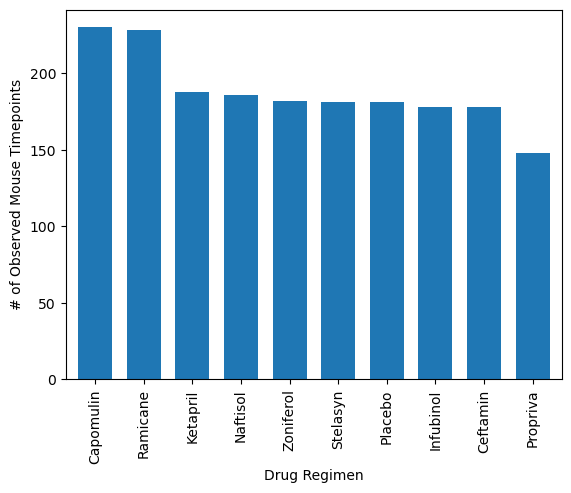

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
no_timepoints = cleaned_mouse_data["Drug Regimen"].value_counts()
no_timepoints_chart = no_timepoints.plot(kind="bar", width=0.7)
no_timepoints_chart.set_xlabel("Drug Regimen")
no_timepoints_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

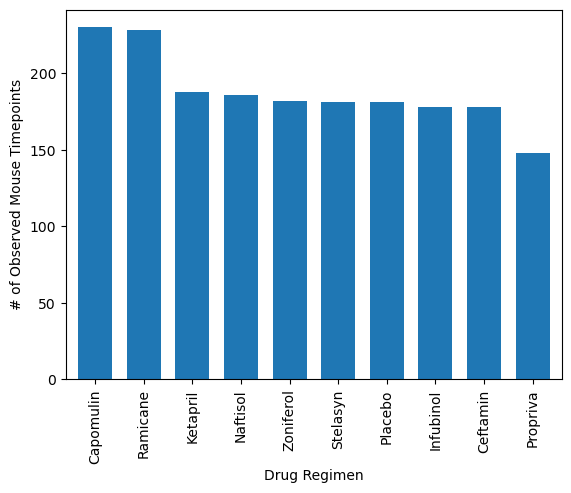

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a list indicating where to write x labels and set figure size to adjust for space
no_timepoints.plot.bar(align="center", width=0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

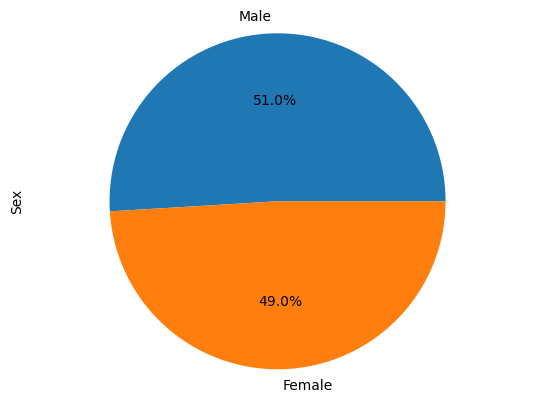

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = cleaned_mouse_data["Sex"].value_counts()
#plt.title("Sex Distribution")
sex_distribution_pie = sex_distribution.plot(autopct="%1.1f%%", kind="pie", y="Sex")
sex_distribution_pie.set_ylabel("Sex")
plt.axis("equal")
plt.show()

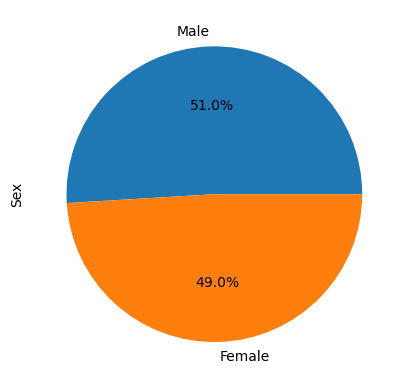

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colours = ["tab:blue", "tab:orange"]
plt.pie(sex_distribution, labels=labels, colors=colours, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoints_drug_data = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"]== "Capomulin") | 
(cleaned_mouse_data["Drug Regimen"]== "Ramicane") | (cleaned_mouse_data["Drug Regimen"]== "Infubinol") | 
(cleaned_mouse_data["Drug Regimen"]== "Ceftamin")]
final_tumor_vol = timepoints_drug_data.groupby("Mouse ID").max()
final_tumor_reset = final_tumor_vol["Timepoint"].reset_index()
final_tumor_reset
four_regimen_data = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"]== "Capomulin") | 
(cleaned_mouse_data["Drug Regimen"]== "Ramicane") | (cleaned_mouse_data["Drug Regimen"]== "Infubinol") | 
(cleaned_mouse_data["Drug Regimen"]== "Ceftamin")]
combined_tumor_data = pd.merge(four_regimen_data, final_tumor_reset, how="outer", on="Mouse ID")
cleaned_tumor_data = combined_tumor_data.drop_duplicates(subset= "Mouse ID", keep = "last")
cleaned_tumor_data
clean_tumor_data = cleaned_tumor_data.drop("Timepoint_y", axis=1).rename(columns={"Timepoint_x":"Timepoint"})
clean_tumor_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
11,c326,5,36.321346,0,Infubinol,Female,18,25
21,c139,45,72.226731,2,Infubinol,Male,11,28
23,v339,5,46.250112,0,Infubinol,Male,20,26
30,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
778,t565,45,34.455298,0,Capomulin,Female,20,17
788,i557,45,47.685963,1,Capomulin,Female,1,24
798,m957,45,33.329098,1,Capomulin,Female,3,19
803,f966,20,30.485985,0,Capomulin,Male,16,17


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
for drug in drugs:
    drugs_data = clean_tumor_data.loc[clean_tumor_data["Drug Regimen"] == drug]
    tumor_volume_data.append(drugs_data["Tumor Volume (mm3)"])


for i, drug in enumerate(drugs):
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile 
    lower_bound = lower_quartile - (1.5*IQR)
    upper_bound = upper_quartile + (1.5*IQR)
    
    outlier_data = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)] 
    
    print(f"{drug}'s potential outliers: {outlier_data}")

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in drugs:
   
    
    
    
   
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 11    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


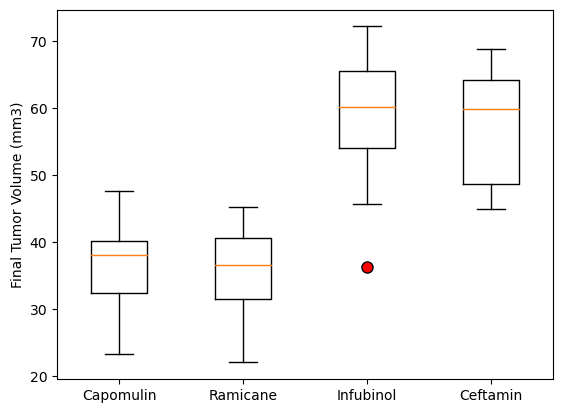

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_marker = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

fig = plt.figure()
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_volume_data, flierprops=outlier_marker)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

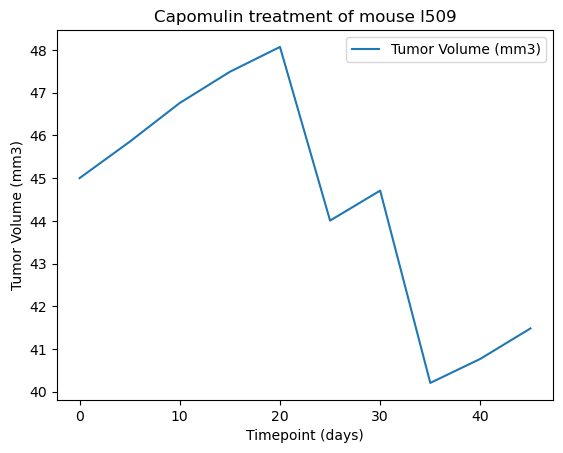

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Tumor_vol_time_capomulin = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"] == "Capomulin") & 
                                                  (cleaned_mouse_data["Mouse ID"] == "l509"),:]
capomulin_vs_time = Tumor_vol_time_capomulin.plot(x="Timepoint", y="Tumor Volume (mm3)", 
                                                  title= "Capomulin treatment of mouse l509")
capomulin_vs_time.set_xlabel("Timepoint (days)")
capomulin_vs_time.set_ylabel("Tumor Volume (mm3)")

C:\Users\tamik\AppData\Local\Temp\ipykernel_35484\2308003589.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average_tumor = capomulin_regimen.groupby("Mouse ID").mean()


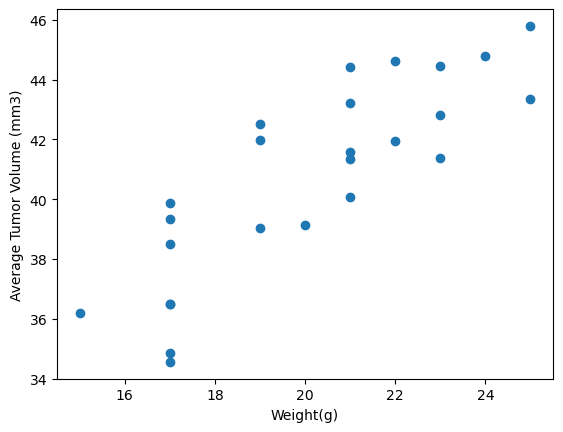

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"] == "Capomulin")]
capomulin_average_tumor = capomulin_regimen.groupby("Mouse ID").mean()
capomulin_average_tumor

weight = capomulin_average_tumor.iloc[:,4]
av_tumor_vol = capomulin_average_tumor.iloc[:,1]
plt.scatter(weight,av_tumor_vol)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


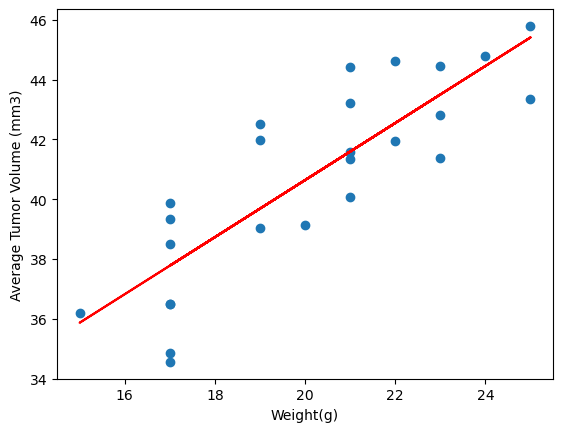

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(weight,av_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_average_tumor.iloc[:,4]
y_values = capomulin_average_tumor.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()